# Summary
* Purpose: Compute resolution functions for PbTe CNCS dataset.
* Procedure:
  - Simulate beam
  - Prepare sample
  - Simulate resolution
* Ei=12meV
* T=150K

* sample cylinder radius=.5cm height=3.5cm at psi=0, the orientation of the axis is [-1,0,1] (x is beam, z is vertical up). u=002, v=220


# Tools

In [2]:
pwd

u'/SNS/users/lj7/simulations/CNCS/AgBiSe2'

** Modify the workdir !!! **

In [3]:
workdir = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/"
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


In [4]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np, os, glob
import histogram.hdf as hh, histogram as H

In [5]:
!which mcvine

/home/lj7/dv/mcvine/export/bin/mcvine


In [6]:
import mcvine.cli

In [7]:
from dgsres.singlextal import use_res_comps
reload( use_res_comps )

<module 'dgsres.singlextal.use_res_comps' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/singlextal/use_res_comps.pyc'>

# Beam

** NOTE: You can skip this section if there is existing beam simulation that you can reuse. Just make a symbolic link **

In [10]:
mkdir -p beam

In [10]:
cd {workdir}/beam/

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/beam


** Options for the beam simulation **

In [12]:
!mcvine instruments cncs beam -h


Simulate CNCS beam and analyze the beam.

Example:

 $ cncs_beam --E=5 --f1=60. --f2=60. --f3=60. --f41=300. --f42=300. --fluxmode=9.0 --ncount=1e8 --nodes=10

For more details of cmd line parameters, run:

 $ cncs_beam --help-properties




In [15]:
# Ei=15, highflux mode

In [15]:
rm -rf *out* *.params log* *.pml run*.sh

In [ ]:
%%time
!mcvine instruments cncs beam -E=12 -f1=60 -f2=60 -f3=60 -f41=300 -f42=300 -ncount=1e10 -fluxmode=9.0 -nodes=20 >log.sim

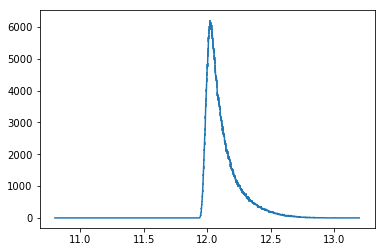

In [11]:
H.plot(hh.load('out/ienergy.h5'))

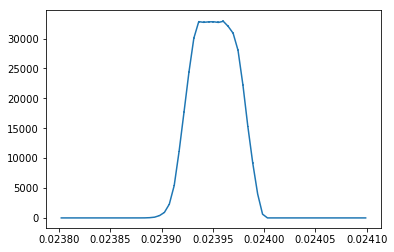

In [24]:
H.plot(hh.load('out/itof.h5')[(0.0238, 0.0241)])

In [12]:
ls out

ienergy.h5  ix_divx.h5  ix_y.h5     iy_divy.h5  props.json
itof.h5     ix_divy.h5  iy_divx.h5  neutrons    rank0-step0/


In [26]:
cat out/props.json

{'emission time': '136.433557079 microsecond', 'flux': '431587.101167 counts per 34kJ pulse', 'tof fwhm': '57.4412900376 microsecond', 'average tof': '23951.8666718 microsecond', 'average energy': '12.1196524 meV'}

In [30]:
!mcvine neutronstorage count out/neutrons

750346


# Sample

In [10]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


In [10]:
%%file sample.yaml
name: PbTe
chemical_formula: PbTe
lattice: 
 constants: 6.461, 6.461, 6.461, 90, 90, 90
 basis_vectors:
  - 6.461, 0, 0
  - 0, 6.461, 0
  - 0, 0, 6.461
excitations:
 - type: DGSresolution
orientation:
 u: 0, 0, 2
 v: 2, 2, 0
shape: |
       <rotation angles="-45.*deg, 0.*deg, 0.*deg">
         <cylinder radius=".5*cm" height="3.5*cm"/>
       </rotation>
temperature: 100*K

Overwriting sample.yaml


In [11]:
sampleyml = "{workdir}/sample.yaml".format(**locals())

In [12]:
print sampleyml

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1//sample.yaml


# CNCS Instrument

In [13]:
beam = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/beam/"
instrument = use_res_comps.instrument(
    name = 'CNCS',
    detsys_radius = "3.5*meter",
    L_m2s = "36.264*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_res_comps.pixel(
    radius = "0.5*inch",
    height = "2.*meter/128",
    pressure = "6*atm",
    )

# psi scan

In [14]:
class psi_scan:
    min = -74.
    max = 50.
    step = 1.

# Try one point

In [7]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


** Define projection direction and starting point **

In [8]:
hkl_projection = np.array([1,1,0])

In [65]:
hkl0 = np.array([0,0,4])
hkl0

array([0, 0, 4])

** Define point of interest **

In [8]:
E = 5
x = 0.

In [67]:
hkl = hkl0 + hkl_projection*x

In [68]:
hkl

array([ 0.,  0.,  4.])

** Run simulation setup **

In [69]:
rm -rf test/

In [70]:
use_res_comps.setup(
    'test',
    sampleyml, beam, E, hkl, hkl_projection,
    psi_scan, instrument, pixel)

Ei=12.1196524, t0=136.433557094
Computed:
* psi=-21.1779437223 degree
* Q=[  3.62720164e+00  -1.40529266e+00   2.01350139e-16]
* hkl2Qmat=[[  2.48422992e-01   6.41204719e-01  -6.87646330e-01]
 [  2.48422992e-01   6.41204719e-01   6.87646330e-01]
 [  9.06800410e-01  -3.51323165e-01   5.03375347e-17]]
* ki=2.41845180576
* vectors ki=[ 2.41845181  0.          0.        ], kf=[ -1.20874984e+00   1.40529266e+00  -2.01350139e-16]
These two numbers should be very close:
  5.0
  5.0
  Ei=12.1196524, Ef=7.1196524
* Ef=7.1196524
* pixel positon=[ -2.28235251e+00   2.65346321e+00  -3.80187844e-16]
* pixel_position=[ -2.28235251e+00   2.65346321e+00  -3.80187844e-16]
t_m2s=0.0239518666718, t_s2p=0.00299893124569, t_m2p=0.0269507979175


In [71]:
ls test

run.py  sample/


In [92]:
%%file test/mc_params.yml
Nbuffer: 100000
Nrounds_beam: 10

Overwriting test/mc_params.yml


In [54]:
# ! cat test/run.py

In [55]:
#! cat test/sample/sampleassembly.xml

In [56]:
# ! cat test/sample/PbTe-scatterer.xml

** Run simulation. This will take a couple minutes **

In [93]:
!cd test && python run.py

weight:  1.0
0-99999: ........../home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")

100000-199999: ..........
200000-299999: ..........
300000-399999: ..........
400000-499999: ..........
500000-599999: ..........
600000-699999: ..........
700000-799999: ..........
800000-899999: ..........
900000-999999: ..........
1000000-1099999: ..........
1100000-1199999: ..........
1200000-1299999: ..........
1300000-1399999: ..........
1400000-1499999: ..........
1500000-1599999: ..........
1600000-1699999: ..........
1700000-1799999: ..........
1800000-1899999: ..........
1900000-1999999: ..........
2000000-2099999: ..........
2100000-2199999: ..........
2200000-2299999: ..........
2300000-2399999: ..........
2400000-2499999: ..........
2500000-2599999: ..........
2600000-2699999: ..........
2700000-2799999: ..........
2800000-2899999: ..........
2900000-2999999: .........

In [31]:
# !cat test/log.run

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


plot z in (0.0, 0.5)


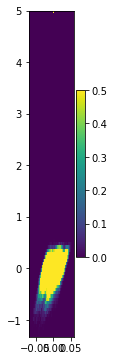

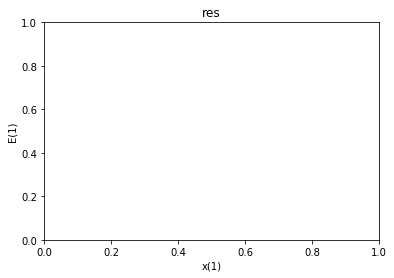

In [9]:
plt.figure(figsize=(1, 6))
H.plot(hh.load("test/res.h5"), max=.5)

In [95]:
ls -tl test

total 280896
-rw-r--r-- 1 lj7 users     37013 Dec  4 11:34 res.h5
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 probs.npy
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 dEs.npy
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 dxs.npy
-rw-r--r-- 1 lj7 users 143789240 Dec  4 11:34 dhkls.npy
-rw-r--r-- 1 lj7 users        32 Dec  4 11:26 mc_params.yml
-rw-r--r-- 1 lj7 users      1269 Nov  8 11:25 run.py
drwxr-xr-x 1 lj7 users         5 Nov  8 11:25 sample/


# Fitting

In [8]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


In [55]:
from dgsres.singlextal import fit2ee, fit_2d_psf
reload(fit2ee)
reload(fit_2d_psf)

<module 'dgsres.singlextal.fit_2d_psf' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/singlextal/fit_2d_psf.pyc'>

In [17]:
Ei = 12.
E0 = 5.

In [56]:
fitter = fit2ee.Fit2EE('./test', qaxis=(-0.3, 0.3, 0.01), Eaxis=(-2, 1, 0.05), Ei=Ei, E=E0)

In [57]:
fitter.load_mcvine_psf_qE()

plot z in (0.0, 4.49001416149)


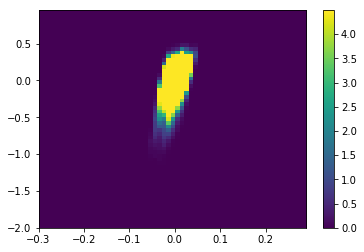

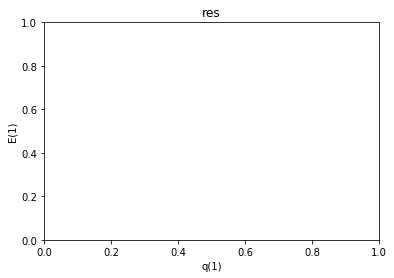

In [24]:
plt.figure(figsize=(6,4))
H.plot(fitter.mcvine_psf_qE)

## Fit I(E)

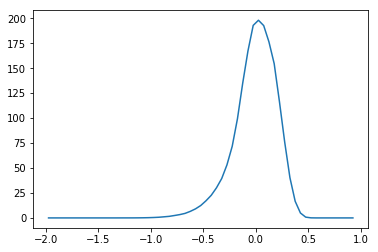

In [25]:
res_E = fitter.mcvine_psf_E
plt.plot(res_E.E, res_E.I)

In [58]:
fitted_params, res_x, res_y, yfit, E_profile = \
    fitter.fit_E_profile(sigma_left=0.3, sigma_right=0.2, ef_width=.05, weight_left=.5)

In [59]:
fitted_params

array([ 0.16549454,  0.26437098,  0.70245226,  0.45876045])

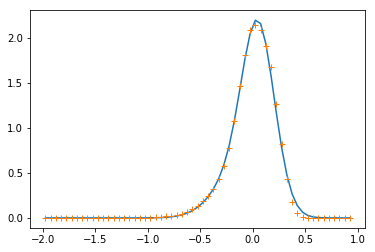

In [60]:
plt.plot(res_x, yfit)
# plt.plot(res_x, E_profile(res_x))
plt.plot(res_x, res_y, '+')

In [61]:
E_profile is fitter.model.E_profile

True

## Fit I(q)

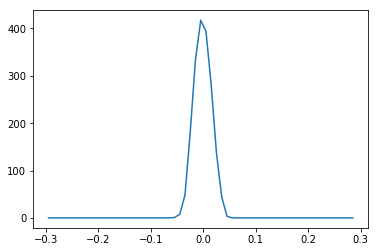

In [62]:
res_q = fitter.mcvine_psf_q
plt.plot(res_q.q, res_q.I)

In [63]:
popt, res_x, res_y, yfit, q_profile = fitter.fit_q_profile(sigma=0.1)

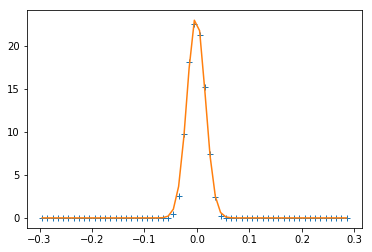

In [64]:
plt.plot(res_x, res_y, '+')
plt.plot(res_x, yfit)

In [65]:
print popt[-1]

0.0173121409146


## res(q,E)

In [66]:
fitted_parameters, qgrid, Egrid, res_z, zfit, qE_profile = fitter.fit_qE_profile(dq_over_dE=0.02)

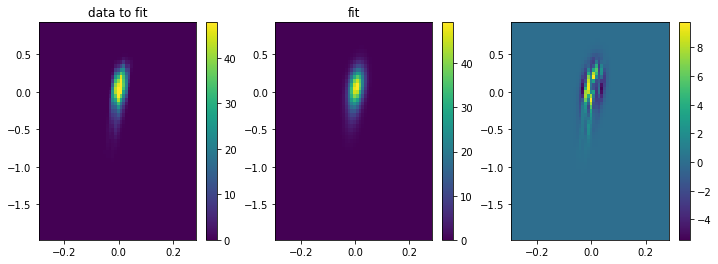

In [69]:
diff = res_z - zfit

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('data to fit')
plt.pcolormesh(qgrid, Egrid, res_z, cmap='viridis')
plt.colorbar()
plt.subplot(1,3,2)
plt.title('fit')
plt.pcolormesh(qgrid, Egrid, zfit, cmap='viridis')
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(qgrid, Egrid, diff, cmap='viridis')
plt.colorbar()